In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Check if the file exists in the current directory
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd

netflix_data = pd.read_csv('/content/drive/MyDrive/NetflixOriginals.csv', encoding='ISO-8859-1')

# Display the first few rows and inspect the columns
print(netflix_data.head())

# Binarize IMDb ratings into 'High' and 'Low' based on a threshold
threshold = 6.5  # Adjust as per your preference
netflix_data['IMDB_class'] = ['High' if score >= threshold else 'Low' for score in netflix_data['IMDB Score']]

# Select features and target variable
features = ['Genre', 'Runtime', 'Language']  # Adjust with actual relevant features
X = netflix_data[features]
y = netflix_data['IMDB_class']

# Encode categorical variables if needed
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  
Accuracy: 0.7264957264957265
Confusion Matrix:
 [[32 21]
 [11 53]]
Classification Report:
               precision    recall  f1-score   support

        High       0.74      0.60      0.67        53
         Low       0.72     

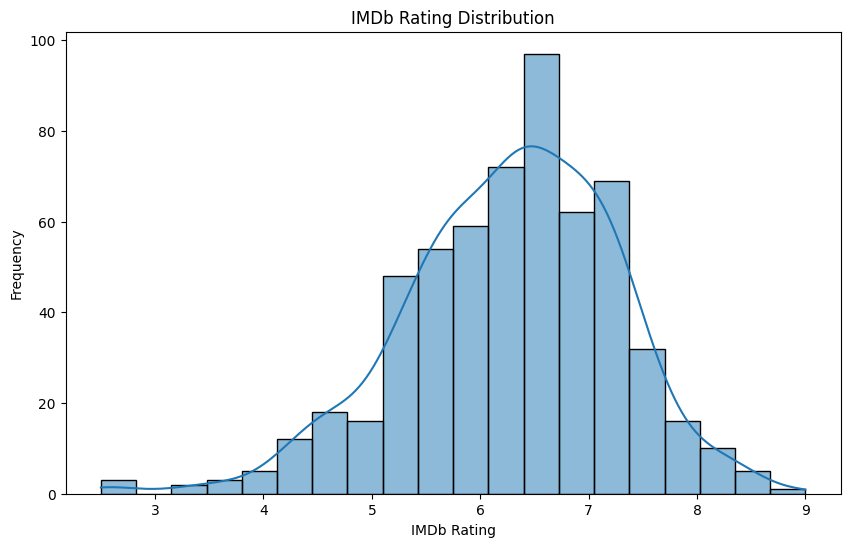

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot IMDb rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['IMDB Score'], bins=20, kde=True)
plt.title('IMDb Rating Distribution')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()


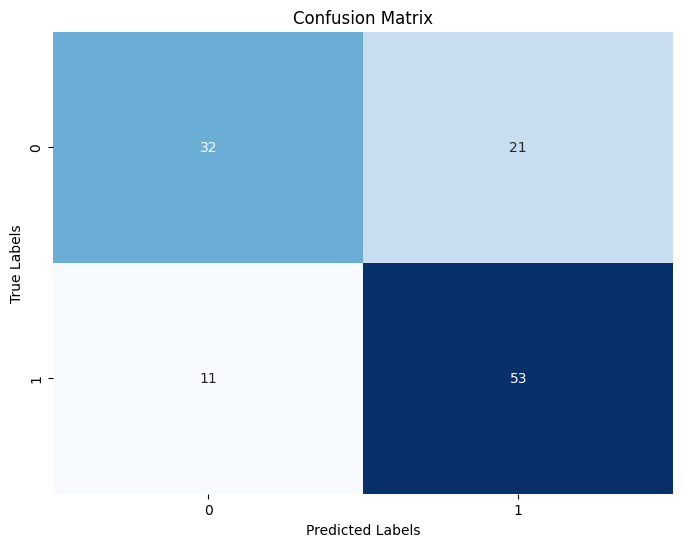

In [12]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example: Assuming you have trained your model and made predictions
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

